# Beispiel Datenanalyse

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set(style = "darkgrid")
sns.set(rc = {"figure.figsize" : (16, 5)})
sns.set(rc={'font.size':12})

In [3]:
data = pd.read_csv('https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv')

In [4]:
data

Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

In [5]:
data.set_index('Date', inplace=True)

In [6]:
type(data.index)

pandas.core.indexes.base.Index

In [7]:
data.index = pd.to_datetime(data.index)

In [8]:
for name in data.columns:
    data.rename(columns={name:name+' [GWh]'}, inplace=True)

In [9]:
data.loc['2008-04':'2008-05'].plot(marker='o')

<AxesSubplot:xlabel='Date'>

In [10]:
weekdays = [0,1,2,3,4,5,6]

p_mean_days = []

for i in weekdays:
    filt = (data.index.weekday == i)
    p_mean = data.loc[filt, 'Consumption [GWh]'].mean()
    p_mean_days.append(p_mean)

Text(0, 0.5, 'Energie [GWh]')

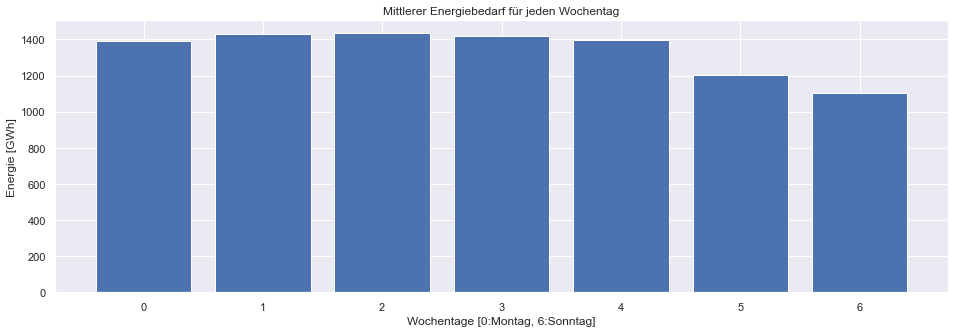

In [11]:
plt.bar(weekdays, p_mean_days)
plt.title('Mittlerer Energiebedarf für jeden Wochentag')
plt.xlabel('Wochentage [0:Montag, 6:Sonntag]')
plt.ylabel('Energie [GWh]')

In [12]:
yearly_data = data.resample('a').sum()/1000

totaler Quatsch

In [13]:
yearly_data

Consumption [GWh]  Wind [GWh]  Solar [GWh]  Wind+Solar [GWh]
Date                                                                    
2006-12-31         489.068536    0.000000     0.000000          0.000000
2007-12-31         496.631847    0.000000     0.000000          0.000000
2008-12-31         495.570876    0.000000     0.000000          0.000000
2009-12-31         459.737428    0.000000     0.000000          0.000000
2010-12-31         488.588700   35.911777     0.000000          0.000000
2011-12-31         484.814086   44.032951     0.000000          0.000000
2012-12-31         469.574754   45.862667    27.887332         73.749999
2013-12-31         463.336853   47.197832    29.559780         76.697443
2014-12-31         504.164821   51.107672    32.498307         83.370502
2015-12-31         505.264563   77.468994    34.907138        112.376132
2016-12-31         505.927354   77.008126    34.562824        111.570950
2017-12-31         504.736369  102.667365    35.882643        138.550008

(0.0, 600.0)

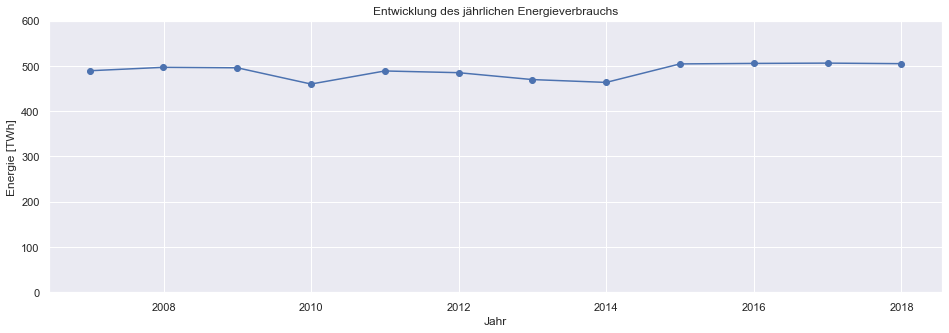

In [14]:
plt.plot(yearly_data['Consumption [GWh]'], marker = 'o')
plt.title('Entwicklung des jährlichen Energieverbrauchs')
plt.xlabel('Jahr')
plt.ylabel('Energie [TWh]')
plt.ylim(0, 600)

In [ ]:
# leere Zelle